## Importing required modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('./Data/winequality-red.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Exploratory Data Analysis

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


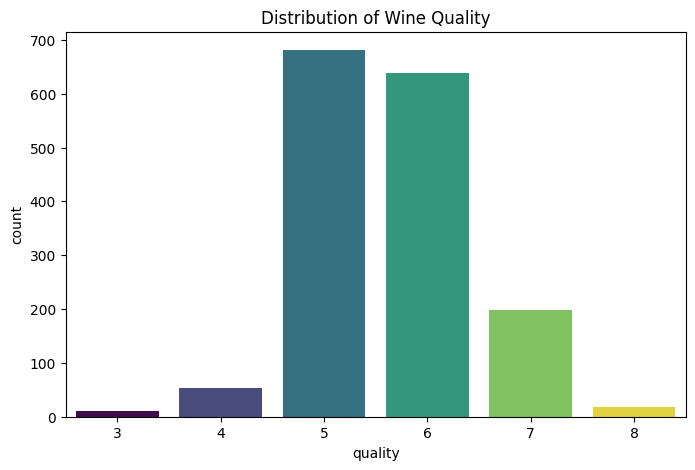

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=data, hue='quality', palette='viridis', legend=False)
plt.title('Distribution of Wine Quality')
plt.show()


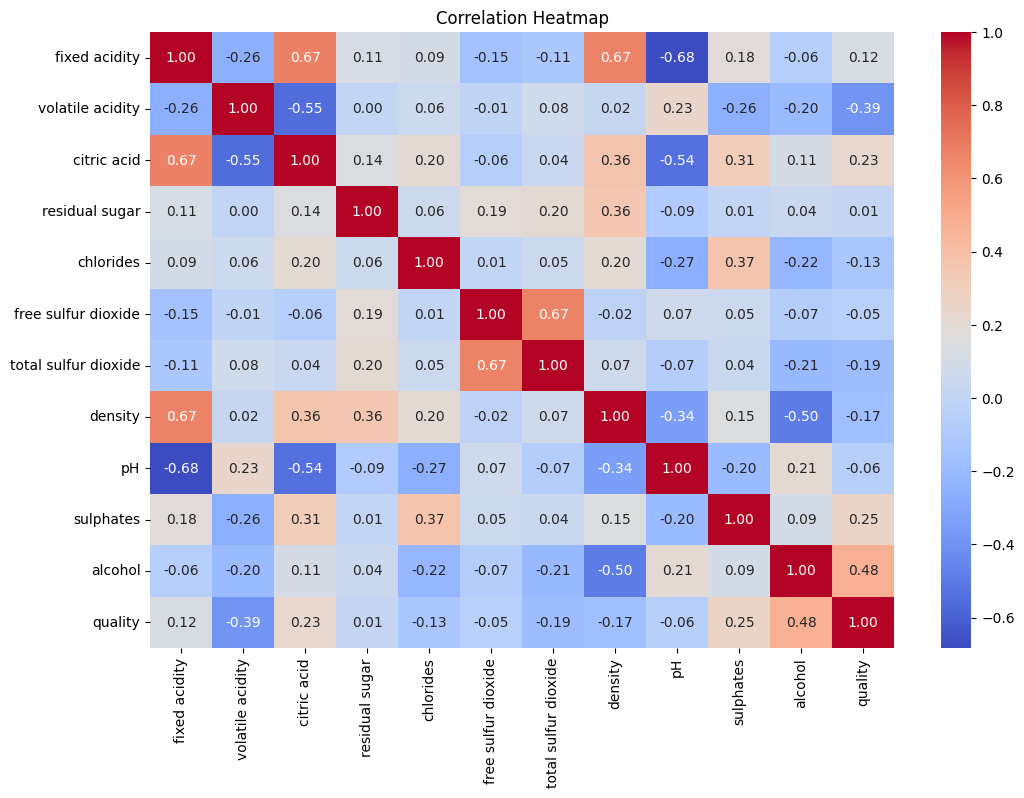

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

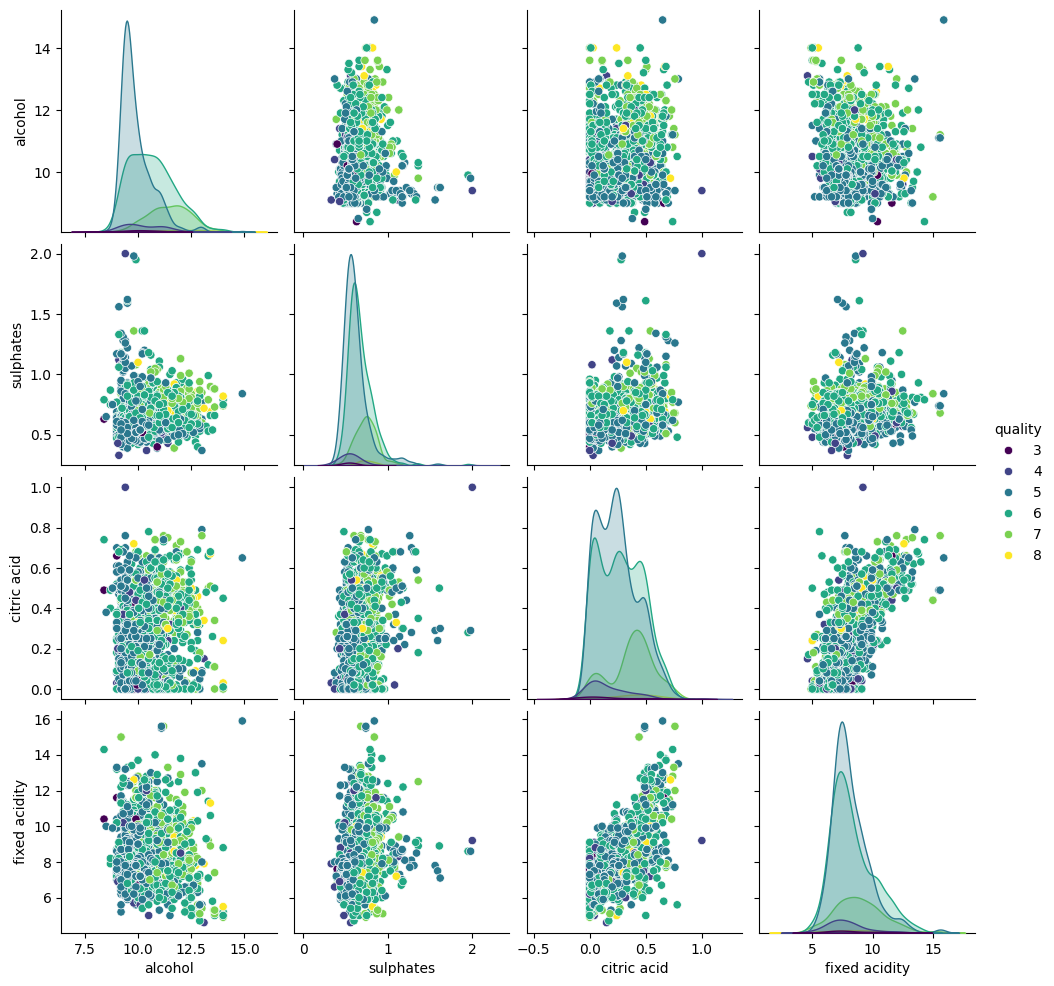

In [8]:
sns.pairplot(data, vars=['alcohol', 'sulphates', 'citric acid', 'fixed acidity'], hue='quality', palette='viridis')
plt.show()

In [9]:
data['quality'] = data['quality'].apply(lambda x: 'low' if x <= 5 else ('medium' if x <= 7 else 'high'))
data['quality'] = data['quality'].map({'low': 0, 'medium': 1, 'high': 2})


In [10]:
X = data.drop('quality', axis=1)
y = data['quality']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

In [13]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = model.predict(X_test)

In [15]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78       149
           1       0.80      0.80      0.80       167
           2       1.00      0.25      0.40         4

    accuracy                           0.79       320
   macro avg       0.86      0.61      0.66       320
weighted avg       0.79      0.79      0.79       320


Confusion Matrix:
 [[118  31   0]
 [ 34 133   0]
 [  0   3   1]]


## Results

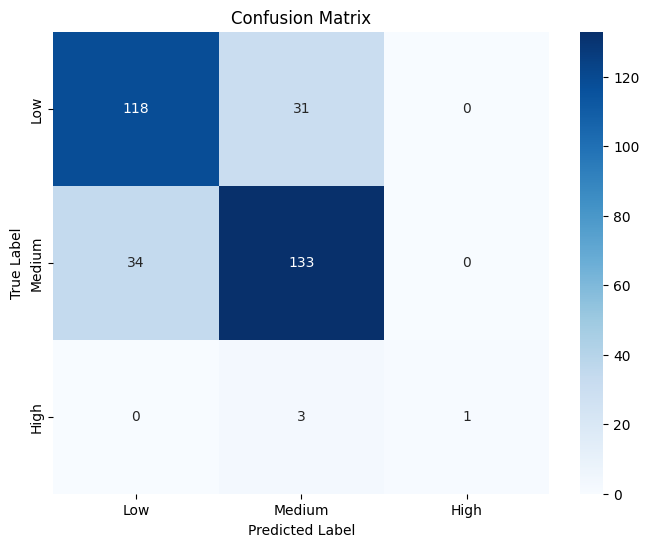

In [16]:
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [17]:
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

# Drop support column for easier plotting
class_report_df.drop(columns=['support'], inplace=True)

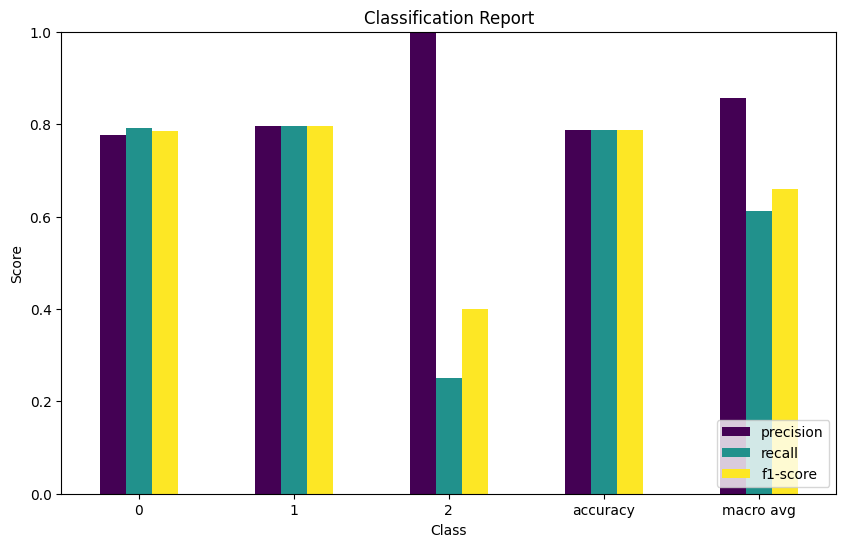

In [18]:
# Plot Precision, Recall, and F1-Score
class_report_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Classification Report')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

## Hyperparameter tuning using GridSearchCV

In [19]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nTuned Classification Report:\n", classification_report(y_test, y_pred_best))
print("\nTuned Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80       149
           1       0.81      0.80      0.80       167
           2       1.00      0.25      0.40         4

    accuracy                           0.80       320
   macro avg       0.86      0.62      0.67       320
weighted avg       0.80      0.80      0.80       320


Tuned Confusion Matrix:
 [[121  28   0]
 [ 34 133   0]
 [  0   3   1]]


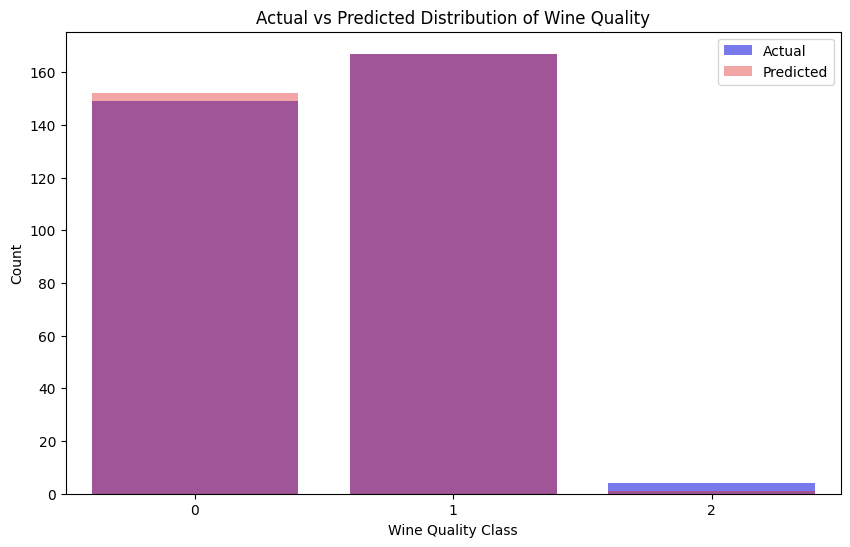

In [20]:
import numpy as np

# Adding actual vs predicted distribution plot
plt.figure(figsize=(10, 6))
sns.countplot(x=y_test, label="Actual", color='blue', alpha=0.6)
sns.countplot(x=y_pred, label="Predicted", color='red', alpha=0.4)
plt.title("Actual vs Predicted Distribution of Wine Quality")
plt.xlabel("Wine Quality Class")
plt.ylabel("Count")
plt.legend()
plt.show()


# Predictions

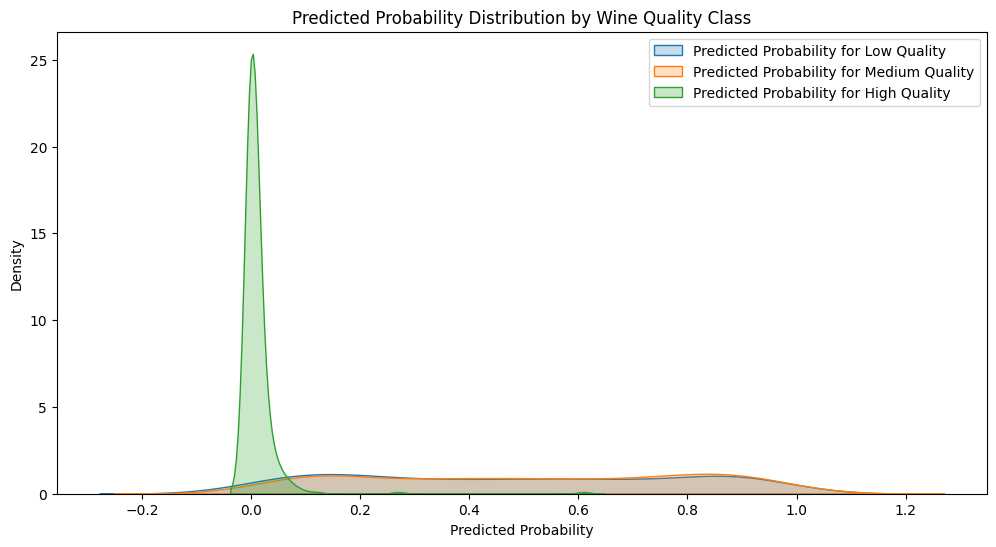

In [22]:
# Probability Distribution for Predicted Classes
# Getting probabilities for each class
y_pred_proba = model.predict_proba(X_test)

# Creating a DataFrame for probabilities
proba_df = pd.DataFrame(y_pred_proba, columns=['Low', 'Medium', 'High'])

plt.figure(figsize=(12, 6))
for col in proba_df.columns:
    sns.kdeplot(proba_df[col], label=f"Predicted Probability for {col} Quality", fill=True)

plt.title("Predicted Probability Distribution by Wine Quality Class")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
plt.legend()
plt.show()
